### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb


### Load data and check

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,movieId,count,rating
0,1,73,0.5
1,1,267,1.0
2,1,96,1.5
3,1,716,2.0
4,1,408,2.5


In [4]:
df.shape

(88255, 3)

In [5]:
testdata = pd.read_csv("test.csv")

In [6]:
testdata.head()

,movieId,count
0,1,5
1,1,37
2,1,6
3,1,72
4,1,47


In [7]:
testdata.shape

(56959, 2)

### In order to do evaluation, resize the train set to (56959, 3)

In [8]:
df2 = df[0:56959]

In [9]:
df2.head()

,movieId,count,rating
0,1,73,0.5
1,1,267,1.0
2,1,96,1.5
3,1,716,2.0
4,1,408,2.5


In [10]:
df2.tail()

,movieId,count,rating
56954,6587,5,4.0
56955,6587,1,5.0
56956,6588,1,2.0
56957,6588,1,2.5
56958,6588,5,3.0


In [11]:
df2.shape

(56959, 3)

### Split the data

In [12]:
X = df2.iloc[:,0:2]
y = df2.iloc[:,2]

In [13]:
X.head()

,movieId,count
0,1,73
1,1,267
2,1,96
3,1,716
4,1,408


In [14]:
y.head()

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
Name: rating, dtype: float64

In [15]:
X.values,y.values

(array([[   1,   73],
        [   1,  267],
        [   1,   96],
        ...,
        [6588,    1],
        [6588,    1],
        [6588,    5]], dtype=int64),
 array([0.5, 1. , 1.5, ..., 2. , 2.5, 3. ]))

### Model Training

In [16]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)

In [17]:
xg_reg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

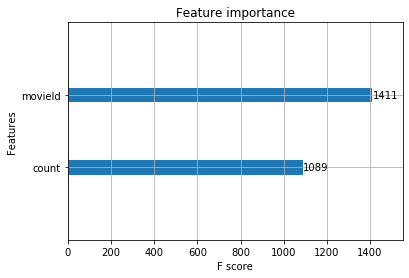

In [18]:
xgb.plot_importance(xg_reg)
plt.show()

In [19]:
preds = xg_reg.predict(testdata)

In [20]:
preds

array([1.9965243, 2.31031  , 2.0045366, ..., 2.4476438, 2.4476438,
       2.4476438], dtype=float32)

### Model Evaluation

In [21]:
#Load the original test dataset
df3 = pd.read_csv("testoriginal.csv")

In [22]:
df3.head()

,movieId,count,rating
0,1,5,0.5
1,1,37,1.0
2,1,6,1.5
3,1,72,2.0
4,1,47,2.5


In [23]:
df3.shape

(56959, 3)

In [24]:
y_test = df3['rating']

In [25]:
y_test.head()

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
Name: rating, dtype: float64

In [26]:
y_test.shape

(56959,)

In [27]:
y_test.values

array([0.5, 1. , 1.5, ..., 1. , 2.5, 4. ])

In [28]:
mse = mean_squared_error(y_test, preds)
mse
print("MSE returned is", mse.round(4))

MSE returned is 1.7955


In [29]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse
print("RMSE returned is", rmse.round(4))

RMSE returned is 1.34


In [30]:
r2 = r2_score(y_test, preds)
r2
print("R2 returned is", r2.round(4) * 100)

R2 returned is -3.7800000000000002
